In [73]:
import cv2
import numpy as np
from scipy.misc import imread, imresize
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
import time

%matplotlib inline

In [418]:
def hog_feature_size(image, pixels_per_cell, cells_per_block, orient):
    sy, sx = image.shape[:2]
    cx, cy = pixels_per_cell
    bx, by = cells_per_block

    n_cellsx = int(np.floor(sx // cx))  # number of cells in x
    n_cellsy = int(np.floor(sy // cy))  # number of cells in y
    n_blocksx = (n_cellsx - bx) + 1
    n_blocksy = (n_cellsy - by) + 1
    
    return n_blocksy * n_blocksx * by * bx * orient

def hog_features(img, orient, pix_per_cell, cells_per_block, vis=False):
    if len(img.shape) == 2:
        img = np.expand_dims(img, axis=2)

    features = []

    if vis:
        hog_image = np.zeros(img.shape, dtype=np.float32)

    for ch in range(img.shape[2]):
        hog_result = hog(img[:, :, ch], orientations=orient, pixels_per_cell=pix_per_cell,
                         cells_per_block=cells_per_block, transform_sqrt=True,
                         visualise=vis, feature_vector=False)

        if vis:
            features.append(hog_result)
            hog_image[:, :, ch] = hog_result[1]
        else:
            features.append(hog_result)

    #features = features.ravel()
    features = np.array(features)

    if vis:
        return features, hog_image
    else:
        return features

# Sample data

In [75]:
car_64x64 = imread('../test_images/car_64x64.jpg')
car_128x128 = imread('../test_images/car_128x128.jpg')
car_64x128 = imread('../test_images/car_64x128.jpg')

images = [car_64x64, car_128x128, car_64x128]
titles = ['64x64', '128x128', '64x128']

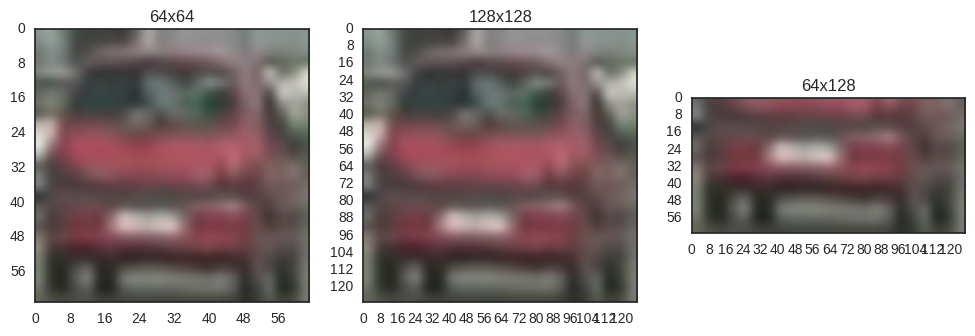

In [76]:
sns.set_style(style='white')
fig, axis = plt.subplots(1, 3, figsize=(12,6))
for i, (img, title) in enumerate(zip(images, titles)):   
    axis[i].imshow(img)
    axis[i].set_title(title)
    axis[i].set_xticks(np.arange(0, img.shape[1]+8, 8))
    axis[i].set_yticks(np.arange(0, img.shape[0]+8, 8))
    axis[i].set_xlim(0, img.shape[1]-1)
    axis[i].set_ylim(img.shape[0]-1, 0)

#plt.xticks(np.arange(0, 72, 8))
plt.show()

# Default HOG implementation

In [77]:
orient = 9
pix_per_cell = (8, 8)
cells_per_block = (2, 2)
img_size = (64, 64)

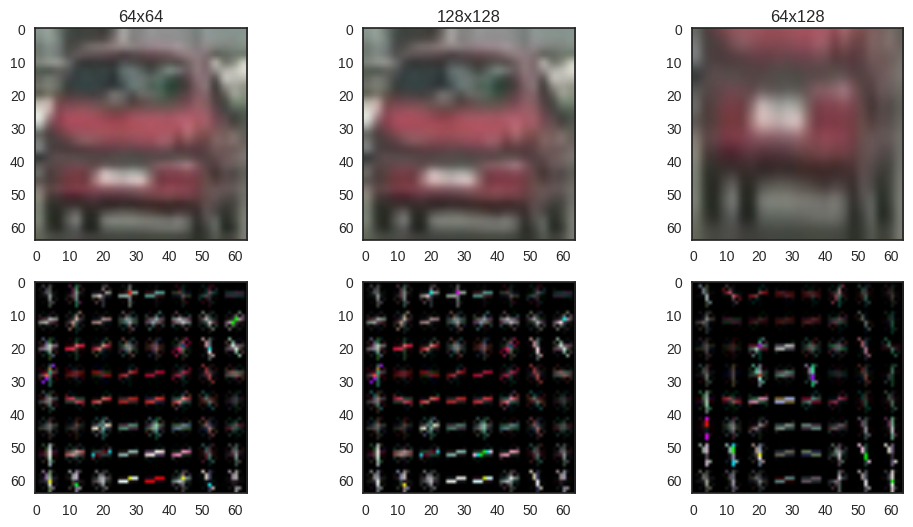

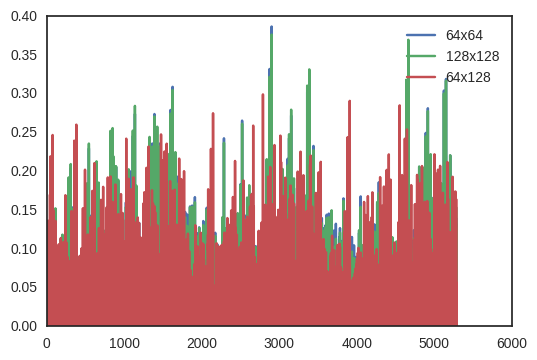

In [78]:
features = []

fig, axis = plt.subplots(2, 3, figsize=(12,6))
for i, (img, title) in enumerate(zip(images, titles)):
    img = cv2.resize(img, img_size)
    axis[0, i].imshow(img)
    axis[0, i].set_title(title)
    
    feature_vec, img_hog = hog_features(img, orient, pix_per_cell, cells_per_block, vis=True)
    features.append(feature_vec)
    axis[1, i].imshow(img_hog)
plt.show()   

hogs = []
for feature_vec, title in zip(features, titles):
    hogs.append(plt.plot(feature_vec, label=title)[0])
    
plt.legend(handles=hogs)
plt.show()

# HOG with fix number of cells

In [79]:
orient = 9
nb_cells = (8, 8)
cells_per_block = (2, 2)

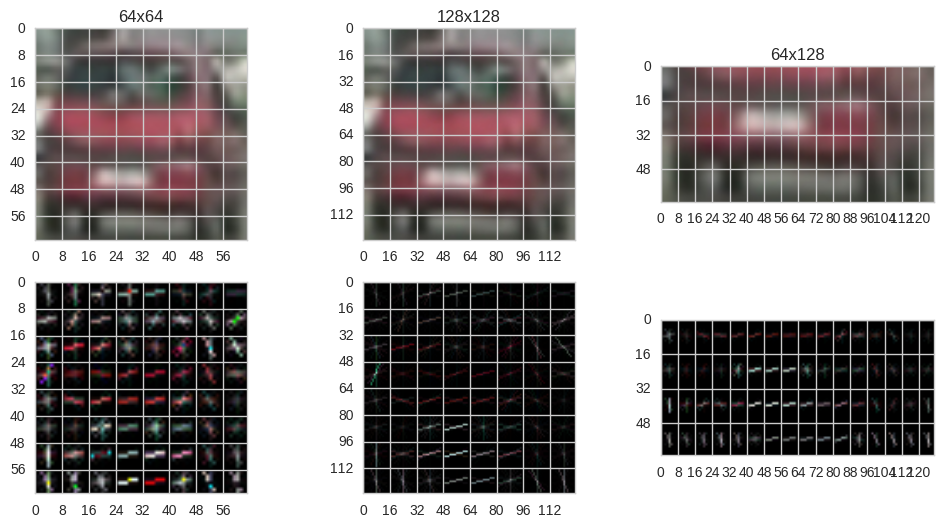

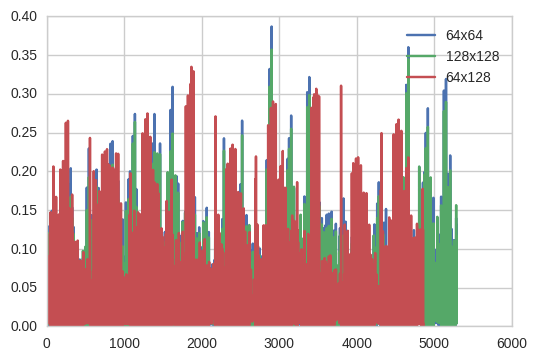

In [80]:
sns.set_style(style='whitegrid')
features = []

fig, axis = plt.subplots(2, 3, figsize=(12,6))
for i, (img, title) in enumerate(zip(images, titles)):
    axis[0, i].imshow(img)
    axis[0, i].set_title(title)

    img_height = img.shape[0]
    img_width = img.shape[1]
    px = int(np.floor(img_width // nb_cells[1]))
    py = int(np.floor(img_height // nb_cells[0]))
    pix_per_cell = (py, px)

    for j in range(2):
        axis[j, i].set_yticks(np.arange(0, img_height+px, px))
        axis[j, i].set_xticks(np.arange(0, img_width+py, py))
        axis[j, i].set_xlim(0, img_width-1)
        axis[j, i].set_ylim(img_height-1, 0)
    

    feature_vec, img_hog = hog_features(img, orient, pix_per_cell, cells_per_block, vis=True)
    features.append(feature_vec)
    axis[1, i].imshow(img_hog)
plt.show()

hogs = []
for feature_vec, title in zip(features, titles):
    hogs.append(plt.plot(feature_vec, label=title)[0])
    
plt.legend(handles=hogs)
plt.show()

In [448]:
img = imread('../test_images/test1.jpg')

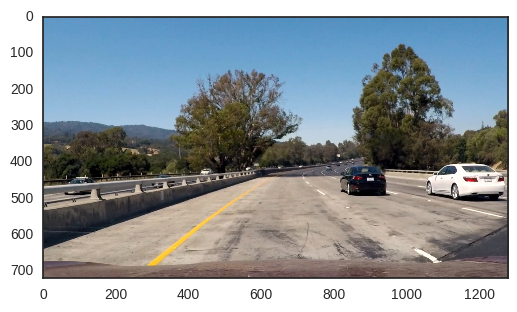

In [449]:
plt.imshow(img)

In [450]:
t1 = time.time()
feature_vec = hog_features(img[400:496, :, :], orient, pix_per_cell, cells_per_block, vis=False)
print(time.time() - t1)

0.3226468563079834


In [451]:
t1 = time.time()
for i in range(400):
    feature_vec_win = hog_features(car_64x64, orient, pix_per_cell, cells_per_block, vis=False)
print(time.time() - t1)

3.1387672424316406


In [92]:
feature_vec.shape

(85860,)

In [94]:
feature_vec_win.shape

(2268,)

shape: (64, 72)


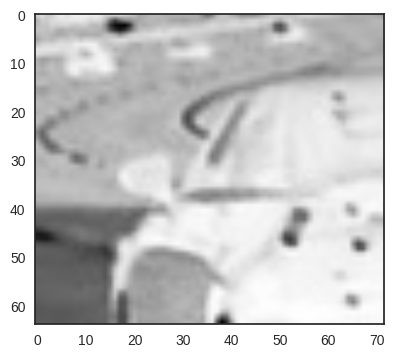

shape: (64, 64)


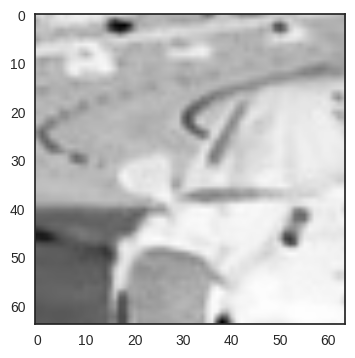

In [393]:
sns.set_style(style='white')
img = imread('../test_images/test1.jpg')
img = cv2.cvtColor(img[400:464, 800:872, :], cv2.COLOR_RGB2GRAY)
print('shape:', img.shape)
plt.imshow(img)
plt.show()

img_win = img[:64, :64]
print('shape:', img_win.shape)
plt.imshow(img_win)
plt.show()

In [593]:
orient = 9
pix_per_cell = (8, 8)
cells_per_block = (2, 2)

sns.set_style(style='white')
img = imread('../test_images/test1.jpg')
img = cv2.cvtColor(img[400:528, 800:928, :], cv2.COLOR_RGB2GRAY)
img_win = img[64:, 0:64]

In [594]:
feature_vec_all, all_img = hog_features(img, orient, pix_per_cell, cells_per_block, vis=True)
print(feature_vec_all.shape)
feature_vec_win, win_image = hog_features(img_win, orient, pix_per_cell, cells_per_block, vis=True)
print(feature_vec_win.shape)

(1, 2)
(1, 2)


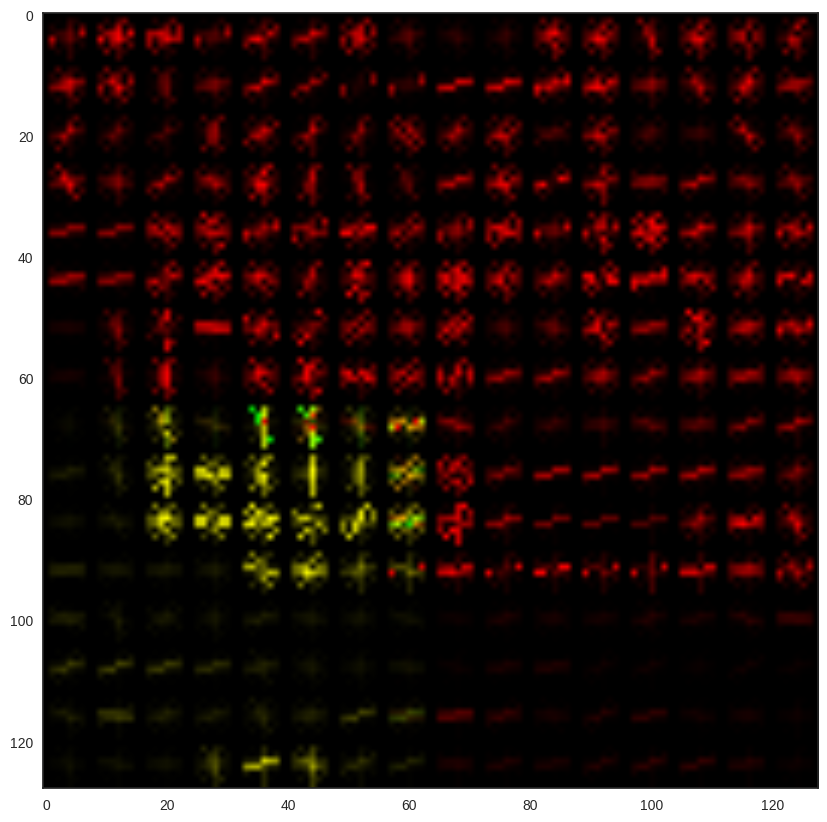

In [596]:
win_over = np.zeros(all_img[:,:,0].shape)
win_over[64:, 0:64] = win_image[:,:,0]

plt.figure(figsize=(10, 10))
plt.imshow(np.stack((all_img[:,:,0], win_over, np.zeros(all_img[:,:,0].shape)), axis=2))

In [597]:
feature_vec_all = feature_vec_all[0][0]
feature_vec_win = feature_vec_win[0][0]

In [598]:
feature_vec_all.shape

(15, 15, 2, 2, 9)

In [583]:
feature_vec_all.shape

(15, 15, 2, 2, 9)

In [584]:
feature_vec_all = feature_vec_all.reshape((30, 30, 9))
feature_vec_win = feature_vec_win.reshape((14, 14, 9))

In [592]:
features[0][(np.abs(features[0]-features[1])>0.01)].size

45

In [558]:
features[1].max()

0.20990303259460982

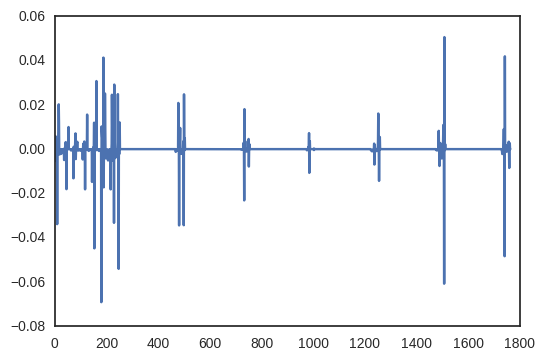

In [600]:
plt.plot(feature_vec_all[8:15,:7].ravel() - feature_vec_win.ravel())
plt.show()

In [254]:
for i,j in zip(feature_vec_all.ravel()[:1764], feature_vec_win.ravel()):
    print(i, j)

0.0214598561095 0.0214598561095
0.00194750333358 0.00194750333358
0.0104470599845 0.0104470599845
0.0447210713984 0.0447210713984
0.0966507944002 0.0966507944002
0.0100130392688 0.0100130392688
0.0143246752462 0.0143246752462
0.00419324428118 0.00419324428118
0.0 0.0
0.0325615778672 0.0325615778672
0.0145744512044 0.0145744512044
0.0457738757271 0.0457738757271
0.0318359104716 0.0318359104716
0.118079301654 0.118079301654
0.0210775842609 0.0210775842609
0.049544761625 0.049544761625
0.0174450519313 0.0174450519313
0.00222851500743 0.00222851500743
0.0185946432926 0.0185946432926
0.00548343339809 0.00548343339809
0.0116330095063 0.0116330095063
0.0129314716513 0.0129314716513
0.0585665826471 0.0585665826471
0.0159042194139 0.0159042194139
0.0187278433695 0.0187278433695
0.0132228011218 0.0132228011218
0.0233756860527 0.0233756860527
0.0132100504167 0.0132100504167
0.0118845575585 0.0118845575585
0.0245788123286 0.0245788123286
0.0442283418117 0.0442283418117
0.0827454542798 0.0827454542

In [229]:
feature_vec_win.ravel()

array([ 0.03533397,  0.03982506,  0.03815799, ...,  0.00086904,
        0.        ,  0.00087003])

In [231]:
feature_vec_win.ravel().shape

(1764,)

In [139]:
stacked = np.concatenate((feature_vec_win,feature_vec_win,feature_vec_win,feature_vec_win,feature_vec_win))

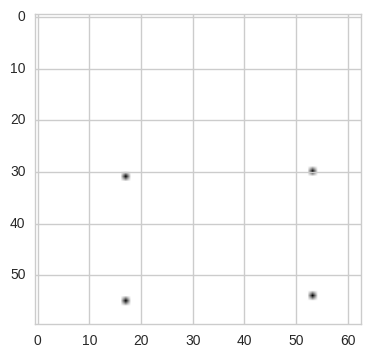

In [140]:
plt.imshow((feature_vec_all==stacked).reshape((60, -1)))

In [128]:
3780/60

63.0